# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
citiesFile = "Output Files/Cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [19]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_dictionary_list = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [20]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

print('--- Beginning Data Retrieval ---')

counter = 1

for city in cities:

    query_url = f"{url}appid={api_key}&units={units}&q={city}"
    counter +=1
    
    # 2.) send the order
    # weather_data is the dictionary
    request_data = requests.get(query_url)
    time.sleep(.02)
    
    if request_data.status_code == 404:
        print('City not found', city)
    else:
        weather_data = request_data.json()

        weather_dict = {
            'City': weather_data['name'],
            'Cloudiness': weather_data['clouds']['all'],
            'Country': weather_data['sys']['country'],
            'Date': weather_data['dt'],
            'Humidity': weather_data['main']['humidity'],
            'Lat': weather_data['coord']['lat'],
            'Lng': weather_data['coord']['lon'],
            'Max Temp': weather_data['main']['temp_max'],
            'Wind Speed': weather_data['wind']['speed']
        }
        
        print(f"Processing Record {counter} | {city}")

        # 4.) Add each dictionary to our empty list, one at a time
        city_dictionary_list.append(weather_dict)
    
print('--- Data Retrieval Complete ---')


--- Beginning Data Retrieval ---
Processing Record 2 | kutum
Processing Record 3 | barrow
Processing Record 4 | ushuaia
Processing Record 5 | upernavik
Processing Record 6 | bredasdorp
Processing Record 7 | saint-paul
Processing Record 8 | constitucion
Processing Record 9 | adrar
Processing Record 10 | saint-philippe
Processing Record 11 | albany
Processing Record 12 | port elizabeth
Processing Record 13 | kapaa
Processing Record 14 | rikitea
Processing Record 15 | dawlatabad
Processing Record 16 | cape town
Processing Record 17 | new norfolk
Processing Record 18 | provideniya
Processing Record 19 | hilo
Processing Record 20 | puerto ayora
Processing Record 21 | rehoboth
City not found illoqqortoormiut
Processing Record 23 | mataura
Processing Record 24 | moron
Processing Record 25 | quatre cocos
Processing Record 26 | morondava
Processing Record 27 | kudahuvadhoo
Processing Record 28 | holetown
Processing Record 29 | grindavik
Processing Record 30 | port blair
Processing Record 31 | s

Processing Record 256 | mao
Processing Record 257 | pokosnoye
Processing Record 258 | fairbanks
Processing Record 259 | gigmoto
Processing Record 260 | alta floresta
Processing Record 261 | ranapur
Processing Record 262 | polewali
Processing Record 263 | the pas
Processing Record 264 | owosso
City not found lolua
Processing Record 266 | belmonte
Processing Record 267 | yerbogachen
Processing Record 268 | altay
Processing Record 269 | vestmanna
Processing Record 270 | coquimbo
Processing Record 271 | gejiu
Processing Record 272 | kharp
Processing Record 273 | lima
Processing Record 274 | port hardy
Processing Record 275 | naantali
Processing Record 276 | gazli
Processing Record 277 | dingle
Processing Record 278 | nagato
Processing Record 279 | walvis bay
Processing Record 280 | salalah
Processing Record 281 | pszczyna
Processing Record 282 | narsaq
City not found nizhneyansk
Processing Record 284 | salcedo
Processing Record 285 | san matias
Processing Record 286 | cooma
Processing Reco

Processing Record 510 | genhe
Processing Record 511 | susangerd
Processing Record 512 | mayumba
Processing Record 513 | carlton
Processing Record 514 | nanakuli
Processing Record 515 | nyurba
Processing Record 516 | buraydah
Processing Record 517 | ewa beach
Processing Record 518 | cuamba
Processing Record 519 | denizli
Processing Record 520 | tigil
Processing Record 521 | hervey bay
City not found bobo dioulasso
City not found halalo
Processing Record 524 | labuhan
Processing Record 525 | broome
Processing Record 526 | pochutla
Processing Record 527 | male
Processing Record 528 | lakes entrance
Processing Record 529 | alexandria
City not found umzimvubu
Processing Record 531 | miyako
Processing Record 532 | maputo
Processing Record 533 | bolshaya glushitsa
Processing Record 534 | yuzhou
Processing Record 535 | cayon
Processing Record 536 | omboue
Processing Record 537 | tabou
Processing Record 538 | sao jose da coroa grande
Processing Record 539 | ayorou
Processing Record 540 | tautir

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
# create dataframe from city dictionary list
weather_data_df = pd.DataFrame(city_dictionary_list)

# save dataframe as csv
weather_data_df.to_csv(citiesFile, index=False, header=True)

In [23]:
city_dictionary_list

[{'City': 'Kutum',
  'Cloudiness': 100,
  'Country': 'SD',
  'Date': 1563652764,
  'Humidity': 62,
  'Lat': 14.2,
  'Lng': 24.66,
  'Max Temp': 76.3,
  'Wind Speed': 8.52},
 {'City': 'Barrow',
  'Cloudiness': 100,
  'Country': 'AR',
  'Date': 1563652764,
  'Humidity': 84,
  'Lat': -38.31,
  'Lng': -60.23,
  'Max Temp': 57.22,
  'Wind Speed': 12.26},
 {'City': 'Ushuaia',
  'Cloudiness': 40,
  'Country': 'AR',
  'Date': 1563652472,
  'Humidity': 47,
  'Lat': -54.81,
  'Lng': -68.31,
  'Max Temp': 37.4,
  'Wind Speed': 16.11},
 {'City': 'Upernavik',
  'Cloudiness': 100,
  'Country': 'GL',
  'Date': 1563652473,
  'Humidity': 93,
  'Lat': 72.79,
  'Lng': -56.15,
  'Max Temp': 43.54,
  'Wind Speed': 12.35},
 {'City': 'Bredasdorp',
  'Cloudiness': 79,
  'Country': 'ZA',
  'Date': 1563652472,
  'Humidity': 86,
  'Lat': -34.53,
  'Lng': 20.04,
  'Max Temp': 46,
  'Wind Speed': 5.82},
 {'City': 'Saint-Paul',
  'Cloudiness': 75,
  'Country': 'FR',
  'Date': 1563652764,
  'Humidity': 69,
  'Lat': 

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

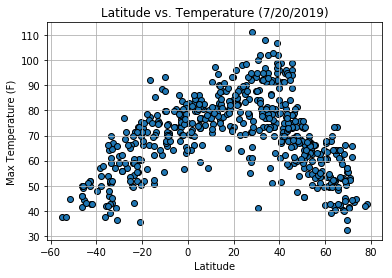

In [24]:
# Extract only the data we need (max temp, latitude)
max_temp_list = weather_data_df['Max Temp']
latitude_list = weather_data_df['Lat']

# Build the graph scatter
plt.scatter(latitude_list, max_temp_list, marker='o', edgecolors='black')

# Modify or Configure the Graph to our Needs
plt.grid(True)
plt.title('Latitude vs. Temperature (7/20/2019)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('Output Files/Latitude Vs Temp')
plt.show()

#### Latitude vs. Humidity Plot

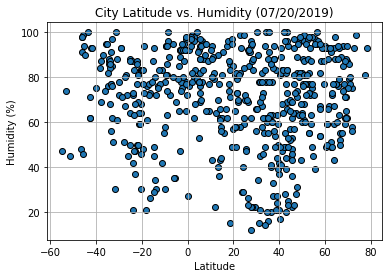

In [25]:
# Extract humidity data
humidity_list = weather_data_df['Humidity']

# Build the graph scatter
plt.scatter(latitude_list, humidity_list, edgecolors='black')

# Modify or Configure the Graph to our Needs
plt.grid(True)
plt.title('City Latitude vs. Humidity (07/20/2019)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('Output Files/City Latitude Vs Humidity')
plt.show()

#### Latitude vs. Cloudiness Plot

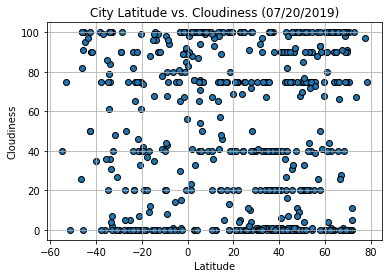

In [26]:
# get cloudiness data
cloudiness_list = weather_data_df['Cloudiness']

# Build the graph scatter
plt.scatter(latitude_list, cloudiness_list, edgecolor ='black')

# Modify or Configure the Graph to our Needs
plt.grid(True)
plt.title('City Latitude vs. Cloudiness (07/20/2019)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('Output Files/City Latitude Vs Cloudiness')
plt.show()

#### Latitude vs. Wind Speed Plot

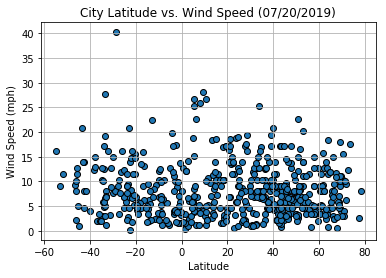

In [27]:
# extract windspeed data
windspeed_list = weather_data_df['Wind Speed']

# Build the graph scatter
plt.scatter(latitude_list, windspeed_list, edgecolor = 'black')

# Modify or Configure the Graph to our Needs
plt.title('City Latitude vs. Wind Speed (07/20/2019)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig('Output Files/City Latitude Vs Wind Speed')
plt.show()

#You must include a written description of three observable trends based on the data.

#1. The maximum temperature rises closer to the equator (latitude = 0).
#2. Humidity appears to be more variable closer to the equator (latitude = 0).
#3. There does not appear to be a pattern between cloudiness and latitude. 